## HW3

Importing required libraries

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os

Loading dataset

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='data/', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='data/', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Defining training and testing functions

In [22]:
def train():
    loss_arr = []
    training_acc = []
    test_acc = []
    for epoch in range(50):  # loop over the dataset multiple times
        running_loss = 0.0
        total = 0.0
        correct = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            outputs = torch.add(outputs, 1e-8)
            _, predicted = torch.max(outputs, 1)
            total += 1
            correct += (predicted == labels).sum().item()
            labels_one_hot = F.one_hot(labels, num_classes=10).to(torch.float)
            loss = criterion(outputs, labels_one_hot)
            loss.backward()
#             nn.utils.clip_grad_norm_(net.parameters(), 0.5) # Use only for lr=10.0
            optimizer.step()
            running_loss += loss.item()
        
        loss_arr.append(running_loss/total)
        training_acc.append(100*correct/(total*batch_size))
        test_acc.append(test())
        print('Epoch ', epoch, ': Loss - ', running_loss/total)
    print('Finished Training')
    plt.title('Epochs vs Loss')
    plt.plot(np.linspace(0, 49, num=50), loss_arr, label='Loss')
    plt.show()
    plt.title('Epochs vs Training accuracy')
    plt.plot(np.linspace(0, 49, num=50), training_acc, label='Training accuracy')
    plt.show()
    plt.title('Epochs vs Test accuracy')
    plt.plot(np.linspace(0, 49, num=50), test_acc, label='Test accuracy')
    plt.show()

def test():
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

Question 2: Network with 1 fc layer

Epoch  0 : Loss -  2.154955420511961
Epoch  1 : Loss -  2.1030591274023056
Epoch  2 : Loss -  2.087269107093811
Epoch  3 : Loss -  2.0687745897221563
Epoch  4 : Loss -  2.06456181027472
Epoch  5 : Loss -  2.0502365242815017
Epoch  6 : Loss -  2.0519677237272265
Epoch  7 : Loss -  2.0430892194366455
Epoch  8 : Loss -  2.0344491728925704
Epoch  9 : Loss -  2.0279187491500377
Epoch  10 : Loss -  2.025977596665919
Epoch  11 : Loss -  2.0235301641976835
Epoch  12 : Loss -  2.012904752062559
Epoch  13 : Loss -  2.0101579025042056
Epoch  14 : Loss -  2.014389204926491
Epoch  15 : Loss -  2.011293950228095
Epoch  16 : Loss -  2.004746803104281
Epoch  17 : Loss -  2.007978124394417
Epoch  18 : Loss -  2.013536818588972
Epoch  19 : Loss -  2.0011093056899307
Epoch  20 : Loss -  2.0019639568206666
Epoch  21 : Loss -  1.9899147148644925
Epoch  22 : Loss -  2.0002809777116775
Epoch  23 : Loss -  1.9992802016484736
Epoch  24 : Loss -  1.9885189433932304
Epoch  25 : Loss -  1.9922595088589192
Epoch  

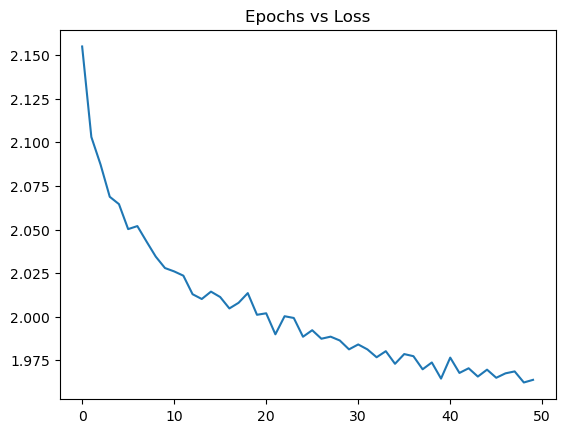

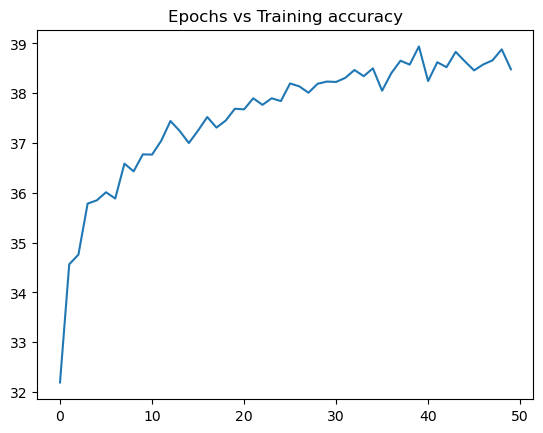

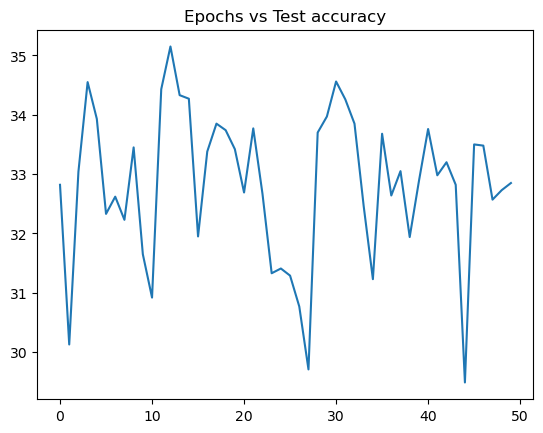

In [7]:
class NetQ2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)
        return x


net = NetQ2()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train()

Question 3: Network with multiple fc layers without ReLU

Epoch  0 : Loss -  1.8228337280583382
Epoch  1 : Loss -  1.7632051998376845
Epoch  2 : Loss -  1.7435712142968178
Epoch  3 : Loss -  1.7350122077989578
Epoch  4 : Loss -  1.7276972238850594
Epoch  5 : Loss -  1.720078555161953
Epoch  6 : Loss -  1.716011523926258
Epoch  7 : Loss -  1.7133661238074303
Epoch  8 : Loss -  1.7089995507454872
Epoch  9 : Loss -  1.7049892569088936
Epoch  10 : Loss -  1.7023641618204117
Epoch  11 : Loss -  1.6991454487752915
Epoch  12 : Loss -  1.6971080269789696
Epoch  13 : Loss -  1.6946689190387725
Epoch  14 : Loss -  1.6921268570446968
Epoch  15 : Loss -  1.6906051598596572
Epoch  16 : Loss -  1.6896996509802342
Epoch  17 : Loss -  1.6874450327587127
Epoch  18 : Loss -  1.685650656415224
Epoch  19 : Loss -  1.6839938693881036
Epoch  20 : Loss -  1.6811612473225594
Epoch  21 : Loss -  1.6812562144255638
Epoch  22 : Loss -  1.67871628013134
Epoch  23 : Loss -  1.6808298673200608
Epoch  24 : Loss -  1.6786804155802726
Epoch  25 : Loss -  1.6763016481995583
E

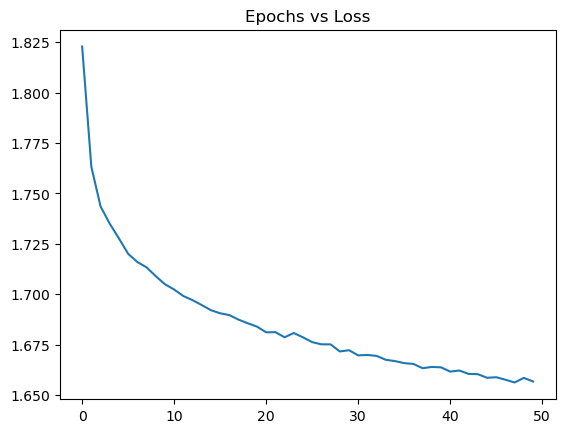

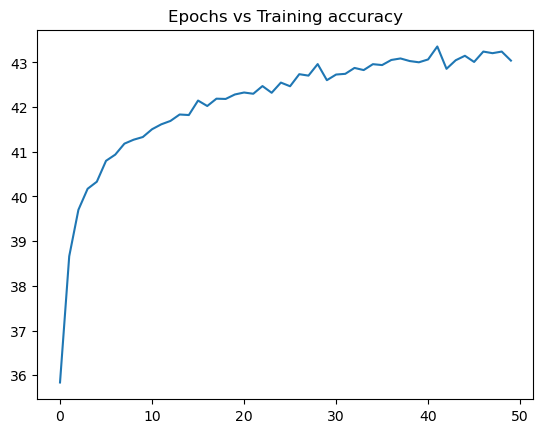

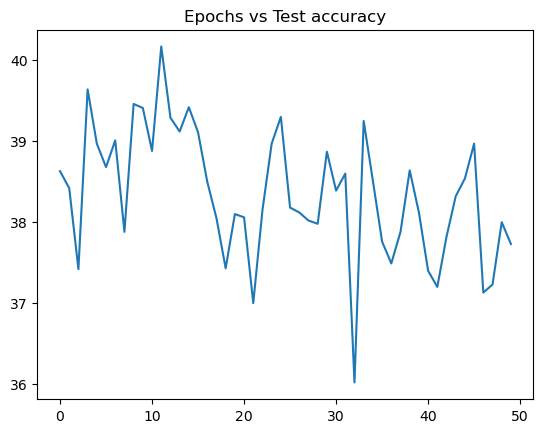

In [8]:
class NetQ3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32, 110)
        self.fc2 = nn.Linear(110, 74)
        self.fc3 = nn.Linear(74, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x


net = NetQ3()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train()

Question 3: Network with multiple fc layers with ReLU

Epoch  0 : Loss -  1.6783830593919753
Epoch  1 : Loss -  1.4723346873104572
Epoch  2 : Loss -  1.38101597743392
Epoch  3 : Loss -  1.3196459373950957
Epoch  4 : Loss -  1.264920858077109
Epoch  5 : Loss -  1.2252492425224184
Epoch  6 : Loss -  1.1890267519401014
Epoch  7 : Loss -  1.154628475856036
Epoch  8 : Loss -  1.1236881877218188
Epoch  9 : Loss -  1.094134034563601
Epoch  10 : Loss -  1.067007241716236
Epoch  11 : Loss -  1.0440919689196348
Epoch  12 : Loss -  1.0230040559999272
Epoch  13 : Loss -  0.9973949621775001
Epoch  14 : Loss -  0.9786686973994225
Epoch  15 : Loss -  0.9610708518785052
Epoch  16 : Loss -  0.9403164420091733
Epoch  17 : Loss -  0.9214846132133342
Epoch  18 : Loss -  0.9074667219284736
Epoch  19 : Loss -  0.8855954918049462
Epoch  20 : Loss -  0.8745117693313491
Epoch  21 : Loss -  0.8578051892151125
Epoch  22 : Loss -  0.8426250077605143
Epoch  23 : Loss -  0.8306214079920575
Epoch  24 : Loss -  0.8131546582119819
Epoch  25 : Loss -  0.8042251997870556
Ep

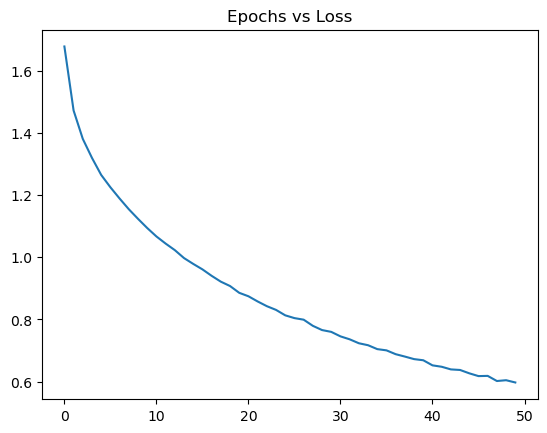

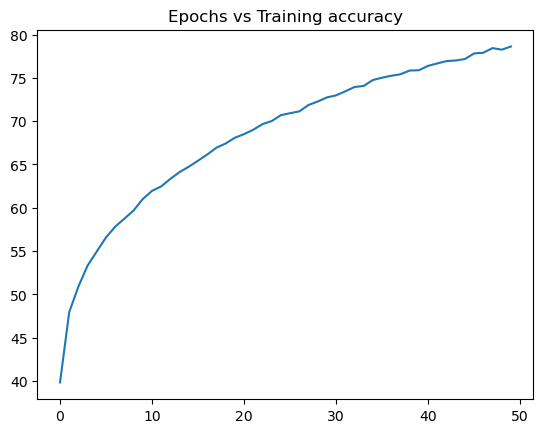

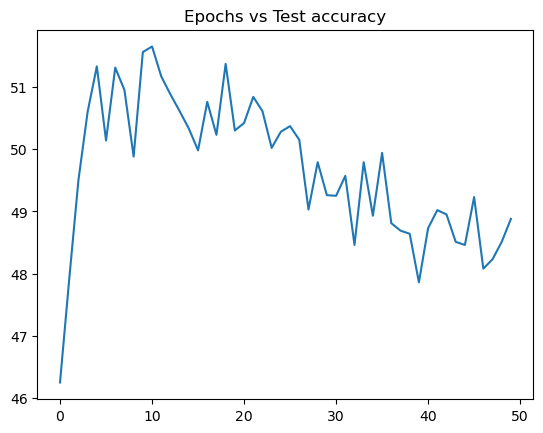

In [9]:
class NetQ3withReLU(NetQ3):

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = NetQ3withReLU()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train()

Question 4: Network with multiple convolutional and fc layers

In [23]:
class NetQ4(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 110)
        self.fc2 = nn.Linear(110, 74)
        self.fc3 = nn.Linear(74, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Question 5: Batch size = 1, lr = 0.001 for network with conv and fc layers

Epoch  0 : Loss -  1.9722514357001195
Epoch  1 : Loss -  1.8754171271555498
Epoch  2 : Loss -  1.8468575281833333
Epoch  3 : Loss -  1.837060237643029
Epoch  4 : Loss -  1.8323401096333627
Epoch  5 : Loss -  1.8230188838354326
Epoch  6 : Loss -  1.8260454339049916
Epoch  7 : Loss -  1.8238748866670997
Epoch  8 : Loss -  1.8248898577005004
Epoch  9 : Loss -  1.8108568845117619
Epoch  10 : Loss -  1.8113084137868611
Epoch  11 : Loss -  1.8196546123400803
Epoch  12 : Loss -  1.8260981351601342
Epoch  13 : Loss -  1.824829250985726
Epoch  14 : Loss -  1.829640381094957
Epoch  15 : Loss -  1.8237803696305466
Epoch  16 : Loss -  1.8230323857255626
Epoch  17 : Loss -  1.8424602114996549
Epoch  18 : Loss -  1.8349118723413749
Epoch  19 : Loss -  1.8305371364172571
Epoch  20 : Loss -  1.8311875548612309
Epoch  21 : Loss -  1.8335213140276874
Epoch  22 : Loss -  1.8427735190007009
Epoch  23 : Loss -  1.8309210836074619
Epoch  24 : Loss -  1.8363446995966002
Epoch  25 : Loss -  1.8358881338399076

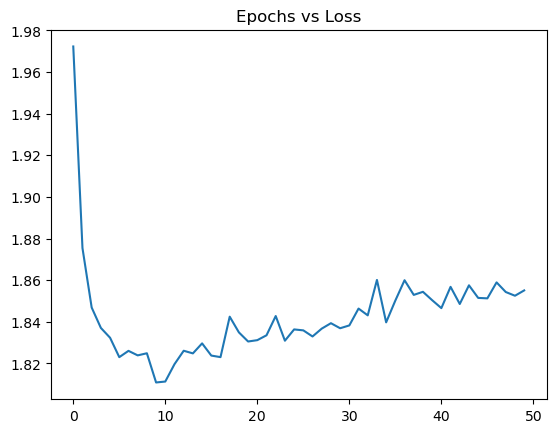

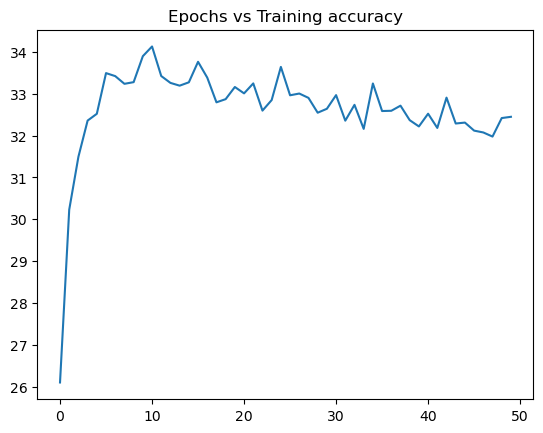

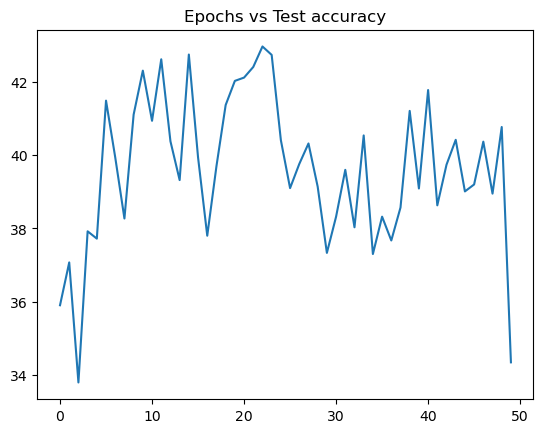

In [9]:
batch_size = 1
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

net = NetQ4()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train()

Question 5/6: Batch size = 4, lr = 0.001 for network with conv and fc layers

Epoch  0 : Loss -  1.7058869637048244
Epoch  1 : Loss -  1.3393910924690962
Epoch  2 : Loss -  1.2120737546247244
Epoch  3 : Loss -  1.1269714460223914
Epoch  4 : Loss -  1.054871818769276
Epoch  5 : Loss -  1.003000183826089
Epoch  6 : Loss -  0.9616882576979044
Epoch  7 : Loss -  0.9236503886659071
Epoch  8 : Loss -  0.8928061810481176
Epoch  9 : Loss -  0.8625305029507726
Epoch  10 : Loss -  0.8390984617267363
Epoch  11 : Loss -  0.8128625436769565
Epoch  12 : Loss -  0.7940870628847229
Epoch  13 : Loss -  0.7781864210102102
Epoch  14 : Loss -  0.7597896513742789
Epoch  15 : Loss -  0.748700319118416
Epoch  16 : Loss -  0.7346395264696245
Epoch  17 : Loss -  0.725205448424397
Epoch  18 : Loss -  0.7101756313639949
Epoch  19 : Loss -  0.6966857698372675
Epoch  20 : Loss -  0.6920556659473196
Epoch  21 : Loss -  0.687338988689946
Epoch  22 : Loss -  0.6753036377393206
Epoch  23 : Loss -  0.6752781152460756
Epoch  24 : Loss -  0.6659276635139194
Epoch  25 : Loss -  0.661680765311974
Ep

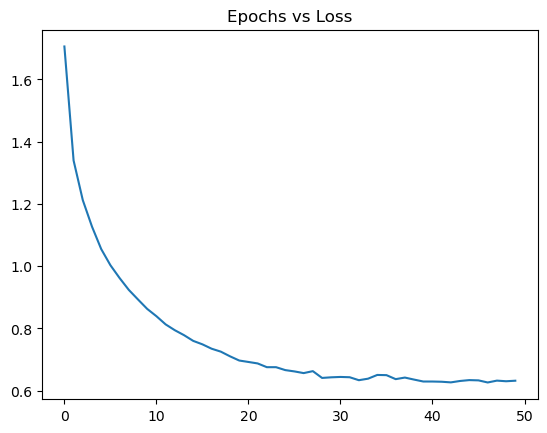

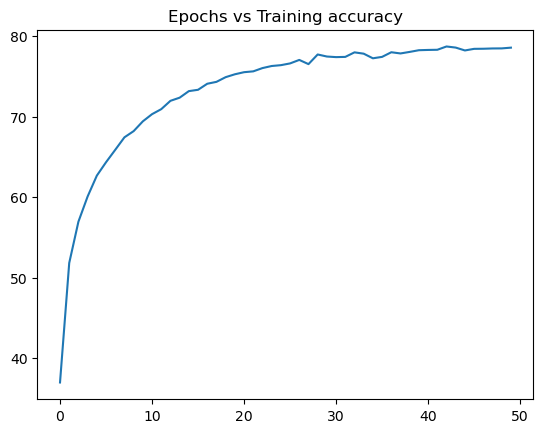

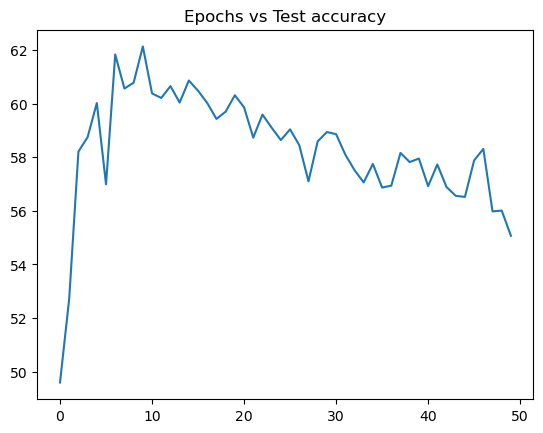

In [11]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

net = NetQ4()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train()

Question 5: Batch size = 1000, lr = 0.001 for network with conv and fc layers

Epoch  0 : Loss -  2.304886655807495
Epoch  1 : Loss -  2.3036033153533935
Epoch  2 : Loss -  2.302240686416626
Epoch  3 : Loss -  2.300846276283264
Epoch  4 : Loss -  2.299374194145203
Epoch  5 : Loss -  2.297730951309204
Epoch  6 : Loss -  2.295820474624634
Epoch  7 : Loss -  2.2935034894943236
Epoch  8 : Loss -  2.2905913305282595
Epoch  9 : Loss -  2.286757311820984
Epoch  10 : Loss -  2.281495313644409
Epoch  11 : Loss -  2.2739592218399047
Epoch  12 : Loss -  2.2629310703277588
Epoch  13 : Loss -  2.2467820167541506
Epoch  14 : Loss -  2.2233489322662354
Epoch  15 : Loss -  2.19226261138916
Epoch  16 : Loss -  2.157795286178589
Epoch  17 : Loss -  2.1264903259277346
Epoch  18 : Loss -  2.0995993614196777
Epoch  19 : Loss -  2.0765943479537965
Epoch  20 : Loss -  2.0562837886810303
Epoch  21 : Loss -  2.0376941537857056
Epoch  22 : Loss -  2.019664921760559
Epoch  23 : Loss -  2.002112474441528
Epoch  24 : Loss -  1.985514714717865
Epoch  25 : Loss -  1.9693473815917968
Epoch  26 

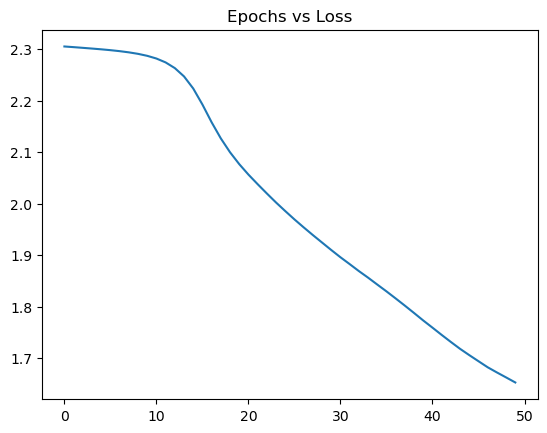

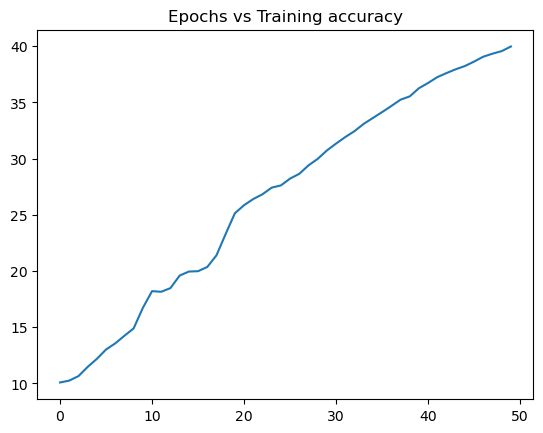

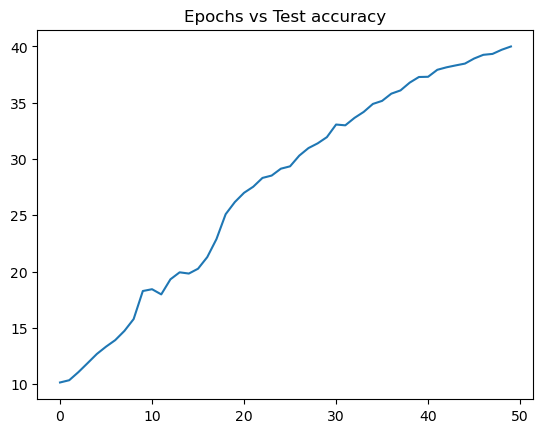

In [12]:
batch_size = 1000
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

net = NetQ4()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train()

Question 6: Batch size = 4, lr = 10 for network with conv and fc layers

Epoch  0 : Loss -  13561.669657537139
Epoch  1 : Loss -  9.536219886994362
Epoch  2 : Loss -  9.231419874475002
Epoch  3 : Loss -  9.422665677833557
Epoch  4 : Loss -  9.515867459700107
Epoch  5 : Loss -  9.509522433509826
Epoch  6 : Loss -  9.4418045802629
Epoch  7 : Loss -  9.401625411731004
Epoch  8 : Loss -  9.549387161598206
Epoch  9 : Loss -  9.378293125870227
Epoch  10 : Loss -  9.483903131041528
Epoch  11 : Loss -  9.311597065241038
Epoch  12 : Loss -  9.301789438295364
Epoch  13 : Loss -  9.235005358830541
Epoch  14 : Loss -  9.459572022435665
Epoch  15 : Loss -  9.433492286678254
Epoch  16 : Loss -  9.419099627633095
Epoch  17 : Loss -  9.439431939754487
Epoch  18 : Loss -  9.459267390265465
Epoch  19 : Loss -  9.306841746473312
Epoch  20 : Loss -  9.350918538513184
Epoch  21 : Loss -  9.467646398477555
Epoch  22 : Loss -  9.511908995409012
Epoch  23 : Loss -  9.394505213935375
Epoch  24 : Loss -  9.471862145705224
Epoch  25 : Loss -  9.32199294204712
Epoch  26 : Loss -  9.41

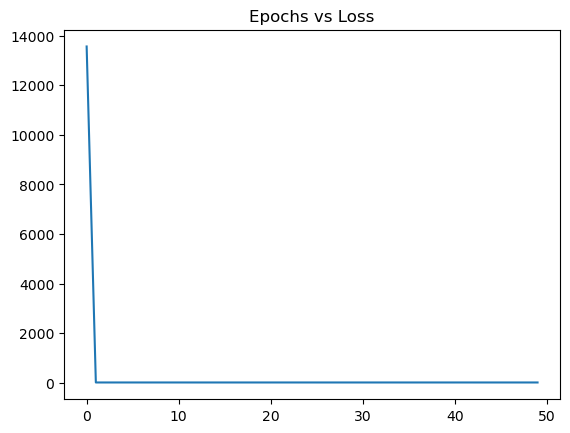

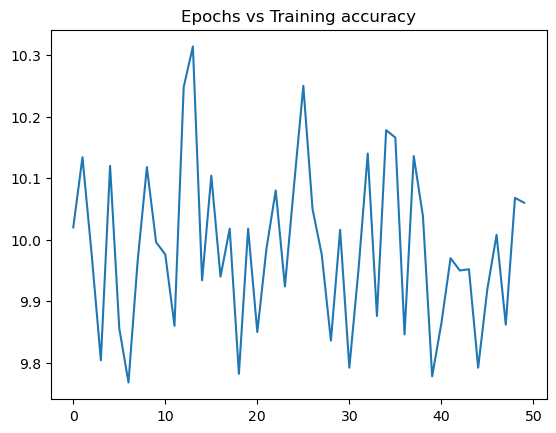

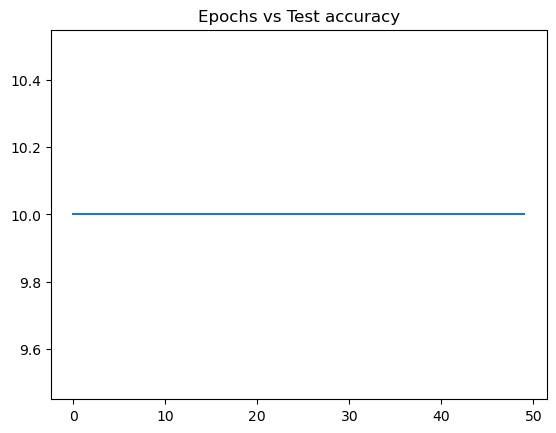

In [24]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

net = NetQ4()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=10.0, momentum=0.9)
train()

Question 6: Batch size = 4, lr = 0.1 for network with conv and fc layers

Epoch  0 : Loss -  2.3591721132469177
Epoch  1 : Loss -  2.3585291032886504
Epoch  2 : Loss -  2.360075119409561
Epoch  3 : Loss -  2.3603695759296417
Epoch  4 : Loss -  2.359459926509857
Epoch  5 : Loss -  2.3608536711502075
Epoch  6 : Loss -  2.3589231452846526
Epoch  7 : Loss -  2.360663920373917
Epoch  8 : Loss -  2.3590227771091463
Epoch  9 : Loss -  2.3620018453693388
Epoch  10 : Loss -  2.358438558654785
Epoch  11 : Loss -  2.3592333416557314
Epoch  12 : Loss -  2.358917816925049
Epoch  13 : Loss -  2.358559181919098
Epoch  14 : Loss -  2.3607073109531402
Epoch  15 : Loss -  2.359448193321228
Epoch  16 : Loss -  2.359938352279663
Epoch  17 : Loss -  2.3580239405536654
Epoch  18 : Loss -  2.358776867647171
Epoch  19 : Loss -  2.3611061069107055
Epoch  20 : Loss -  2.3587124763298033
Epoch  21 : Loss -  2.3593385302352905
Epoch  22 : Loss -  2.3592010867500304
Epoch  23 : Loss -  2.360706423959732
Epoch  24 : Loss -  2.3590777743721008
Epoch  25 : Loss -  2.3605312341499327
Epoch 

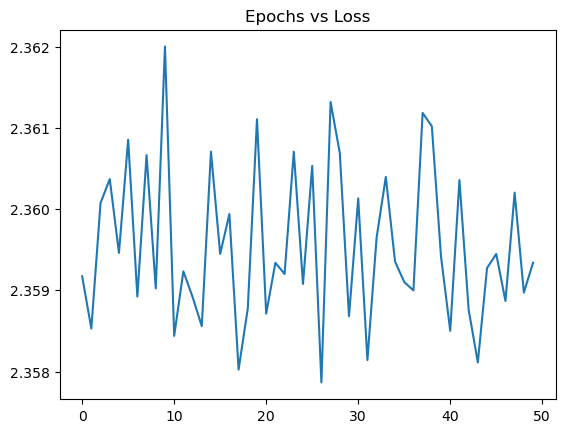

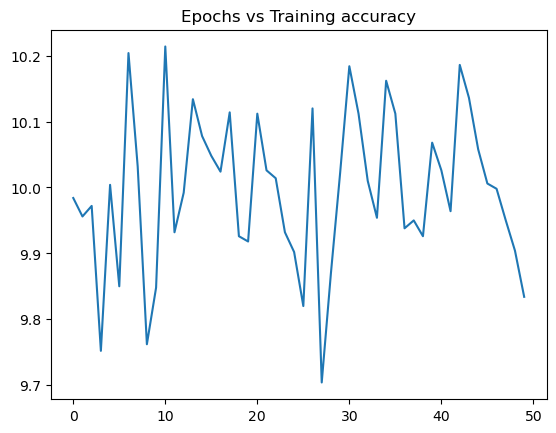

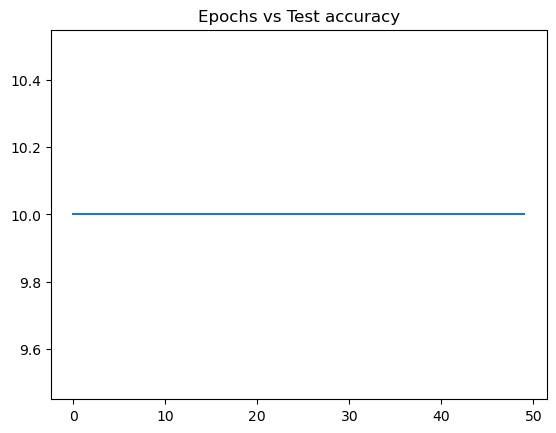

In [15]:
net = NetQ4()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
train()

Question 6: Batch size = 4, lr = 0.01 for network with conv and fc layers

Epoch  0 : Loss -  1.9858640857076646
Epoch  1 : Loss -  2.0046931068468092
Epoch  2 : Loss -  2.101208770685196
Epoch  3 : Loss -  2.081280772895813
Epoch  4 : Loss -  2.048112421236038
Epoch  5 : Loss -  2.018149161672592
Epoch  6 : Loss -  1.9944835369634628
Epoch  7 : Loss -  1.9910424551343917
Epoch  8 : Loss -  1.9872495536518098
Epoch  9 : Loss -  1.9792456358623505
Epoch  10 : Loss -  1.9760948454093934
Epoch  11 : Loss -  1.9721726048612596
Epoch  12 : Loss -  1.989533378381729
Epoch  13 : Loss -  1.977476626558304
Epoch  14 : Loss -  1.9809935835504533
Epoch  15 : Loss -  1.9715686982107163
Epoch  16 : Loss -  1.9740600859069823
Epoch  17 : Loss -  2.0726887031650545
Epoch  18 : Loss -  1.9917530620193482
Epoch  19 : Loss -  1.97408752784729
Epoch  20 : Loss -  1.9726977802944183
Epoch  21 : Loss -  1.9641386893987656
Epoch  22 : Loss -  1.958616413769722
Epoch  23 : Loss -  1.9652114451980591
Epoch  24 : Loss -  1.95984814245224
Epoch  25 : Loss -  1.9760502341270447
Epoch  

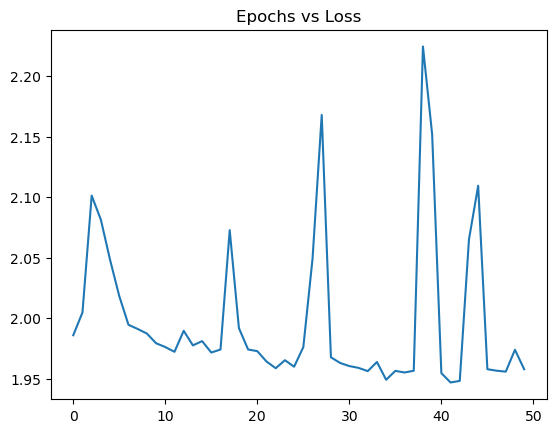

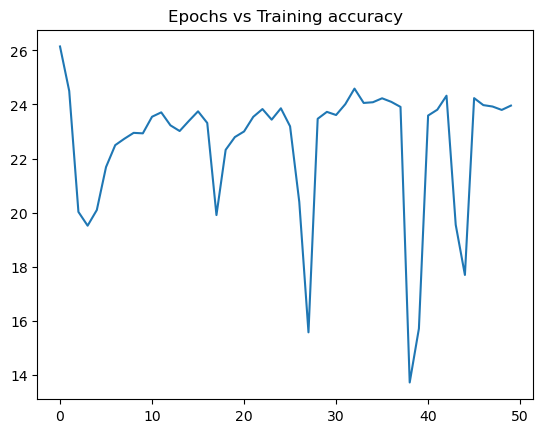

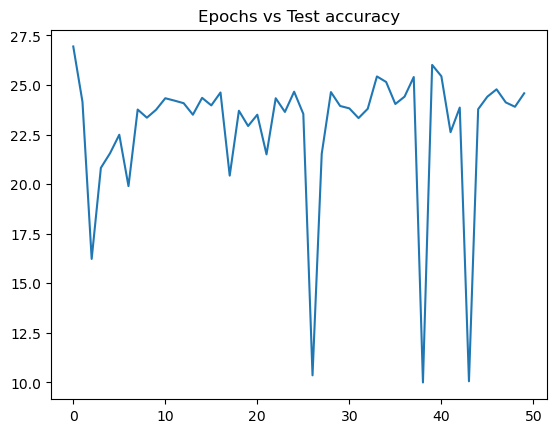

In [5]:
net = NetQ4()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
train()

Question 7: Augmented training set for network with conv and fc layers

Files already downloaded and verified
Epoch  0 : Loss -  1.9741985947418212
Epoch  1 : Loss -  1.7736534146380425
Epoch  2 : Loss -  1.7037885707354545
Epoch  3 : Loss -  1.6728735349440575
Epoch  4 : Loss -  1.6387056185775994
Epoch  5 : Loss -  1.618607809895277
Epoch  6 : Loss -  1.5991966946339606
Epoch  7 : Loss -  1.5815716257047654
Epoch  8 : Loss -  1.5690445928740502
Epoch  9 : Loss -  1.5567650820410253
Epoch  10 : Loss -  1.5483140158212185
Epoch  11 : Loss -  1.535710045016408
Epoch  12 : Loss -  1.53762287124753
Epoch  13 : Loss -  1.5238366768181324
Epoch  14 : Loss -  1.512533413553834
Epoch  15 : Loss -  1.513589162710309
Epoch  16 : Loss -  1.512936867351532
Epoch  17 : Loss -  1.5012921152448655
Epoch  18 : Loss -  1.4987614361464978
Epoch  19 : Loss -  1.4971530624634029
Epoch  20 : Loss -  1.4892466555666923
Epoch  21 : Loss -  1.4919872923648358
Epoch  22 : Loss -  1.4837955082625152
Epoch  23 : Loss -  1.4823078190490604
Epoch  24 : Loss -  1.4787152466475963
Epoc

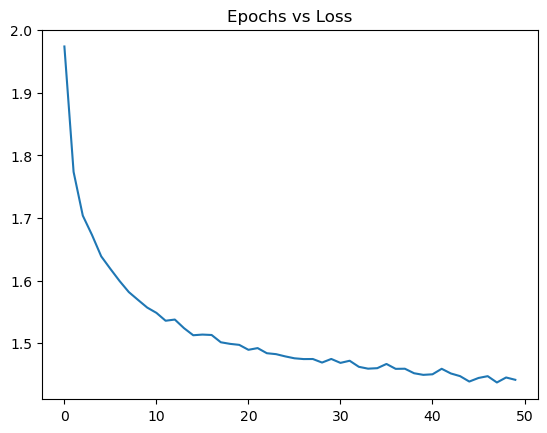

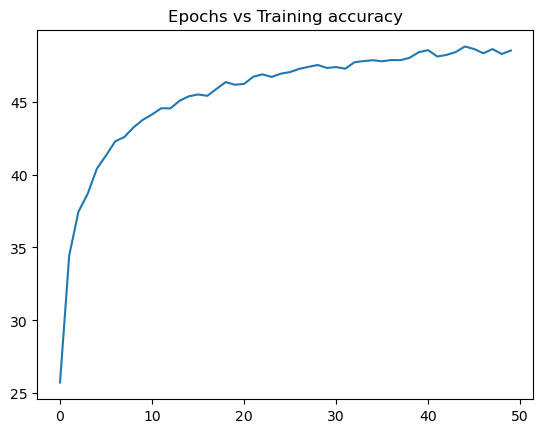

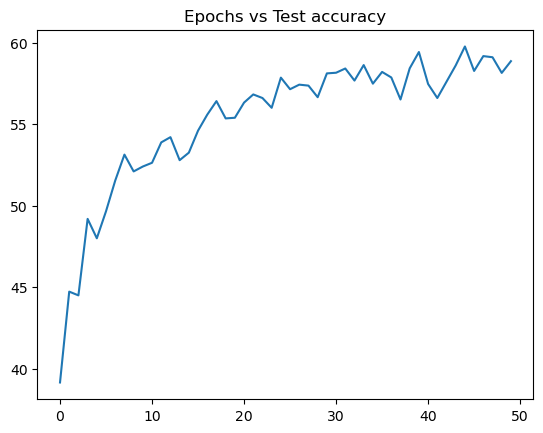

In [7]:
transform = transforms.Compose(
    [transforms.RandomResizedCrop(32),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='data/', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
net = NetQ4()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train()

Question 8: MSELoss for network with conv and fc layers

Epoch  0 : Loss -  0.08842846428096295
Epoch  1 : Loss -  0.08483927699685097
Epoch  2 : Loss -  0.08279685730308295
Epoch  3 : Loss -  0.08138070264220237
Epoch  4 : Loss -  0.08035898664921522
Epoch  5 : Loss -  0.07931369065076113
Epoch  6 : Loss -  0.07841987474292517
Epoch  7 : Loss -  0.07782431348502636
Epoch  8 : Loss -  0.07720298643320798
Epoch  9 : Loss -  0.07675515144661069
Epoch  10 : Loss -  0.07622747468948364
Epoch  11 : Loss -  0.07556247897863388
Epoch  12 : Loss -  0.07519796365037561
Epoch  13 : Loss -  0.07455472988530994
Epoch  14 : Loss -  0.07420850203305483
Epoch  15 : Loss -  0.07361987907603383
Epoch  16 : Loss -  0.07322848118647933
Epoch  17 : Loss -  0.07271287225395441
Epoch  18 : Loss -  0.07238296278938651
Epoch  19 : Loss -  0.07205369128495455
Epoch  20 : Loss -  0.07149766851991415
Epoch  21 : Loss -  0.07104363082095981
Epoch  22 : Loss -  0.07088144313268363
Epoch  23 : Loss -  0.07074463515236974
Epoch  24 : Loss -  0.07012965221613646
Epoch  25 

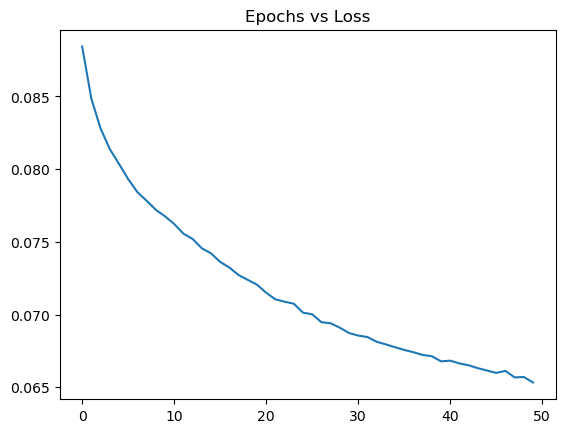

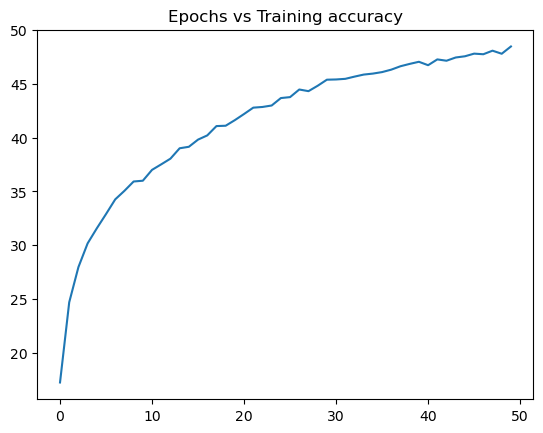

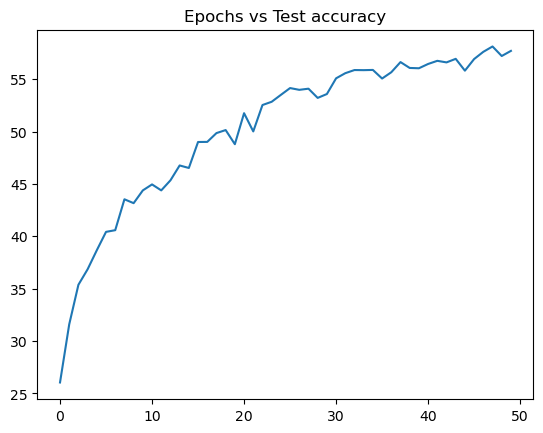

In [8]:
net = NetQ4()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train()